In [105]:
import os
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
emotion_exp = ["fear", "sadness", "happiness", "political", "patriotic"]
cognitive_exp = ["sum", "mul"]

In [4]:
path = "Subject_Images"

csv_paths = []
for subject in os.listdir(path):
        
    experiment_folder = path + "/" + subject
    
    for experiment in sorted(os.listdir(experiment_folder)):
        
        extracted_folder = experiment_folder + "/" + experiment
        
        for files in sorted(os.listdir(extracted_folder)):
        
            if experiment+"_areas.csv" in files:
                path2csv = extracted_folder + "/" + files
                csv_paths.append(path2csv)

In [5]:
def combine_experiments(experiment_name):
    paths = [x for x in csv_paths if experiment_name in x]
    
    df_lists = []
    
    for path in paths:
        df = pd.read_csv(path)
        df_lists.append(df)
    
    combined = pd.concat(df_lists)
    combined = combined.reset_index(drop=True)
    return combined

In [6]:
def postprocess_experiment(X):
    indices = X[ (X["left_eye_area"] == 0) & (X["right_eye_area"] == 0)].index
    X = X.drop(indices)
    X["left_eye_area"]  = X["left_eye_area"].replace(0, X["left_eye_area"].mean())
    X["right_eye_area"] = X["right_eye_area"].replace(0, X["right_eye_area"].mean())
    X = X[(X["left_eye_area"] < 140) | (X["right_eye_area"] < 140)]
    return X

In [7]:
def get_experiment_df(experiment_name):
    combined = combine_experiments(experiment_name)
    processed = postprocess_experiment(combined)
    return processed

In [8]:
normal_df = get_experiment_df("normal")
print(normal_df.mean())

left_eye_area     104.231248
right_eye_area    130.023038
dtype: float64


In [27]:
def get_experiment_results(experiments, normal_df):
    means = []
    for experiment in experiments:
        df_combined = combine_experiments(experiment)
        df_processed = postprocess_experiment(df_combined)
        print("{0} experiment results: Left Eye Pixel Mean Area --> {1}".format(experiment, df_processed["left_eye_area"].mean()))
        print(df_processed.shape)
        means.append(df_processed["left_eye_area"].mean())
    print("Normal Test Result: Left Eye Pixel Mean Area --> {0}".format(normal_df["left_eye_area"].mean()))
    print(normal_df.shape)
    return means

In [10]:
def get_subject_experiment_df(subject, experiment_name):
    for path in csv_paths:
        if subject in path and experiment_name in path:
            df = pd.read_csv(path)
            break
    
    return df

In [31]:
emotion_size = get_experiment_results(emotion_exp, normal_df)

fear experiment results: Left Eye Pixel Mean Area --> 96.12531447574314
(5397, 2)
sadness experiment results: Left Eye Pixel Mean Area --> 103.85617409392039
(4837, 2)
happiness experiment results: Left Eye Pixel Mean Area --> 105.47853240118737
(4644, 2)
political experiment results: Left Eye Pixel Mean Area --> 110.10916440208167
(4921, 2)
patriotic experiment results: Left Eye Pixel Mean Area --> 117.04149303239319
(4623, 2)
Normal Test Result: Left Eye Pixel Mean Area --> 104.23124807090478
(1529, 2)


In [32]:
cognitive_size = get_experiment_results(cognitive_exp, normal_df)

sum experiment results: Left Eye Pixel Mean Area --> 105.39621071907902
(3740, 2)
mul experiment results: Left Eye Pixel Mean Area --> 116.21241742498299
(3817, 2)
Normal Test Result: Left Eye Pixel Mean Area --> 104.23124807090478
(1529, 2)


In [92]:
def plot_subject_experiment(normal_df, experiment_df, ax, experiment_name):
    ax.plot(normal_df["left_eye_area"], 
        label='Normal Göz Bebeği Değişimi', color='green',  alpha=0.7, markersize=5)

    ax.scatter(experiment_df.index,experiment_df["left_eye_area"],
            label="Deney Göz Bebeği Değişimi", color="red", linestyle="-", alpha=0.5)

    legend = ax.legend(loc='upper right', fontsize='x-large')
    ax.set_xlabel('frames')
    ax.set_ylabel('Göz Bebeği Piksel Alanı')
    ax.set_title('{0} Deneyinde Göz Bebeği Değişimi - Normal Göz Bebeği Değişimi'.format(experiment_name), fontsize=15)
    

In [93]:
ali_fear0 = get_subject_experiment_df("Ali", "fear0")
ali_fear1 = get_subject_experiment_df("Ali", "fear1")
ali_fear2 = get_subject_experiment_df("Ali", "fear2")
ali_fear = [ali_fear0, ali_fear1, ali_fear2]
ali_normal = get_subject_experiment_df("Ali", "normal")

In [94]:
fear_names = ["Korku - Görüntü", "Korku - Ses", "Korku - Ses + Görüntü"]

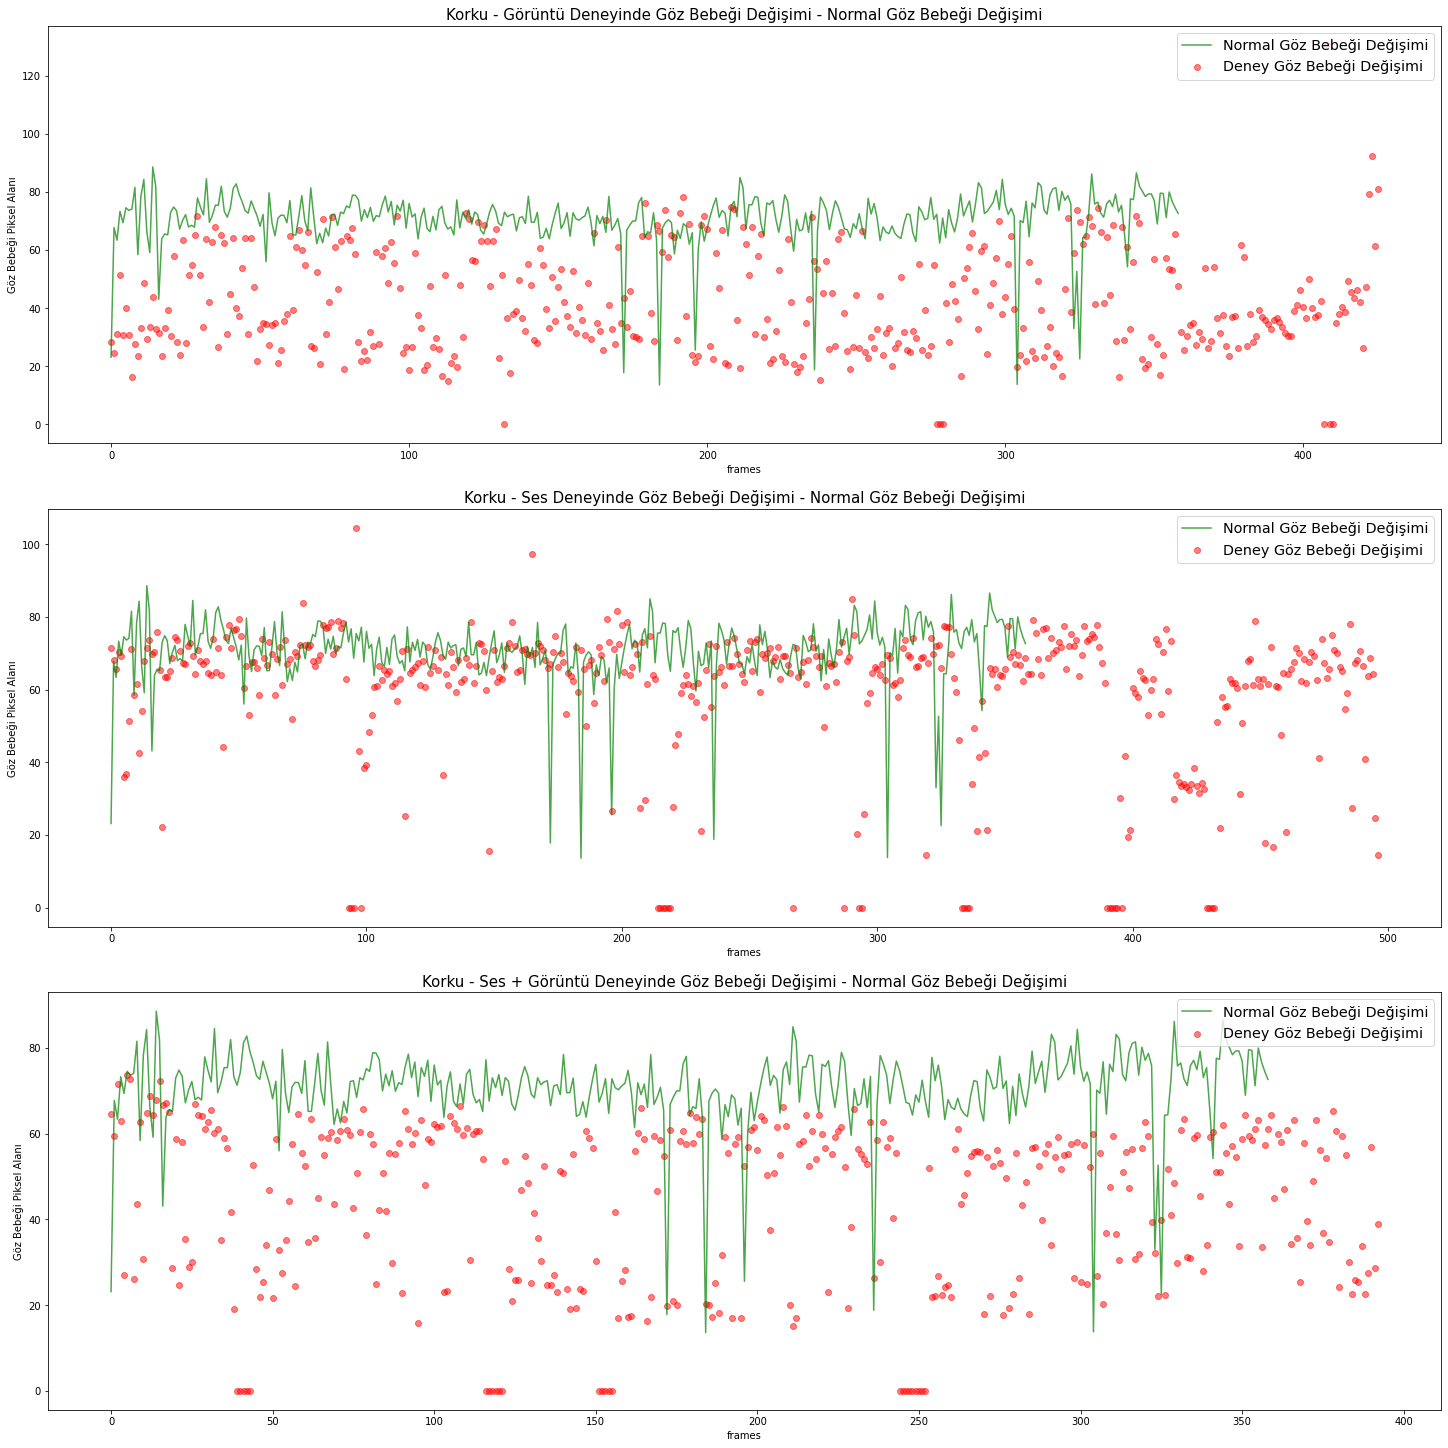

In [95]:
fig, ax = plt.subplots(figsize=(20, 20), nrows=3, ncols=1, constrained_layout=True)

for i,(exp,name) in enumerate(zip(ali_fear, fear_names)):
    plot_subject_experiment(ali_normal, exp, ax[i], name)

plt.show()

In [96]:
rk_sumeasy = get_subject_experiment_df("RebelKing", "sum_easy")
rk_sumhard = get_subject_experiment_df("RebelKing", "sum_hard")
rk_muleasy = get_subject_experiment_df("RebelKing", "multiply_easy")
rk_mulhard = get_subject_experiment_df("RebelKing", "multiply_hard")
rk_cog = [rk_sumeasy, rk_sumhard, rk_muleasy, rk_mulhard]
rk_normal = get_subject_experiment_df("RebelKing", "normal")

In [97]:
exp_names = ["Toplama Kolay", "Toplama Zor", "Çarpma Kolay", "Çarpma Zor"]

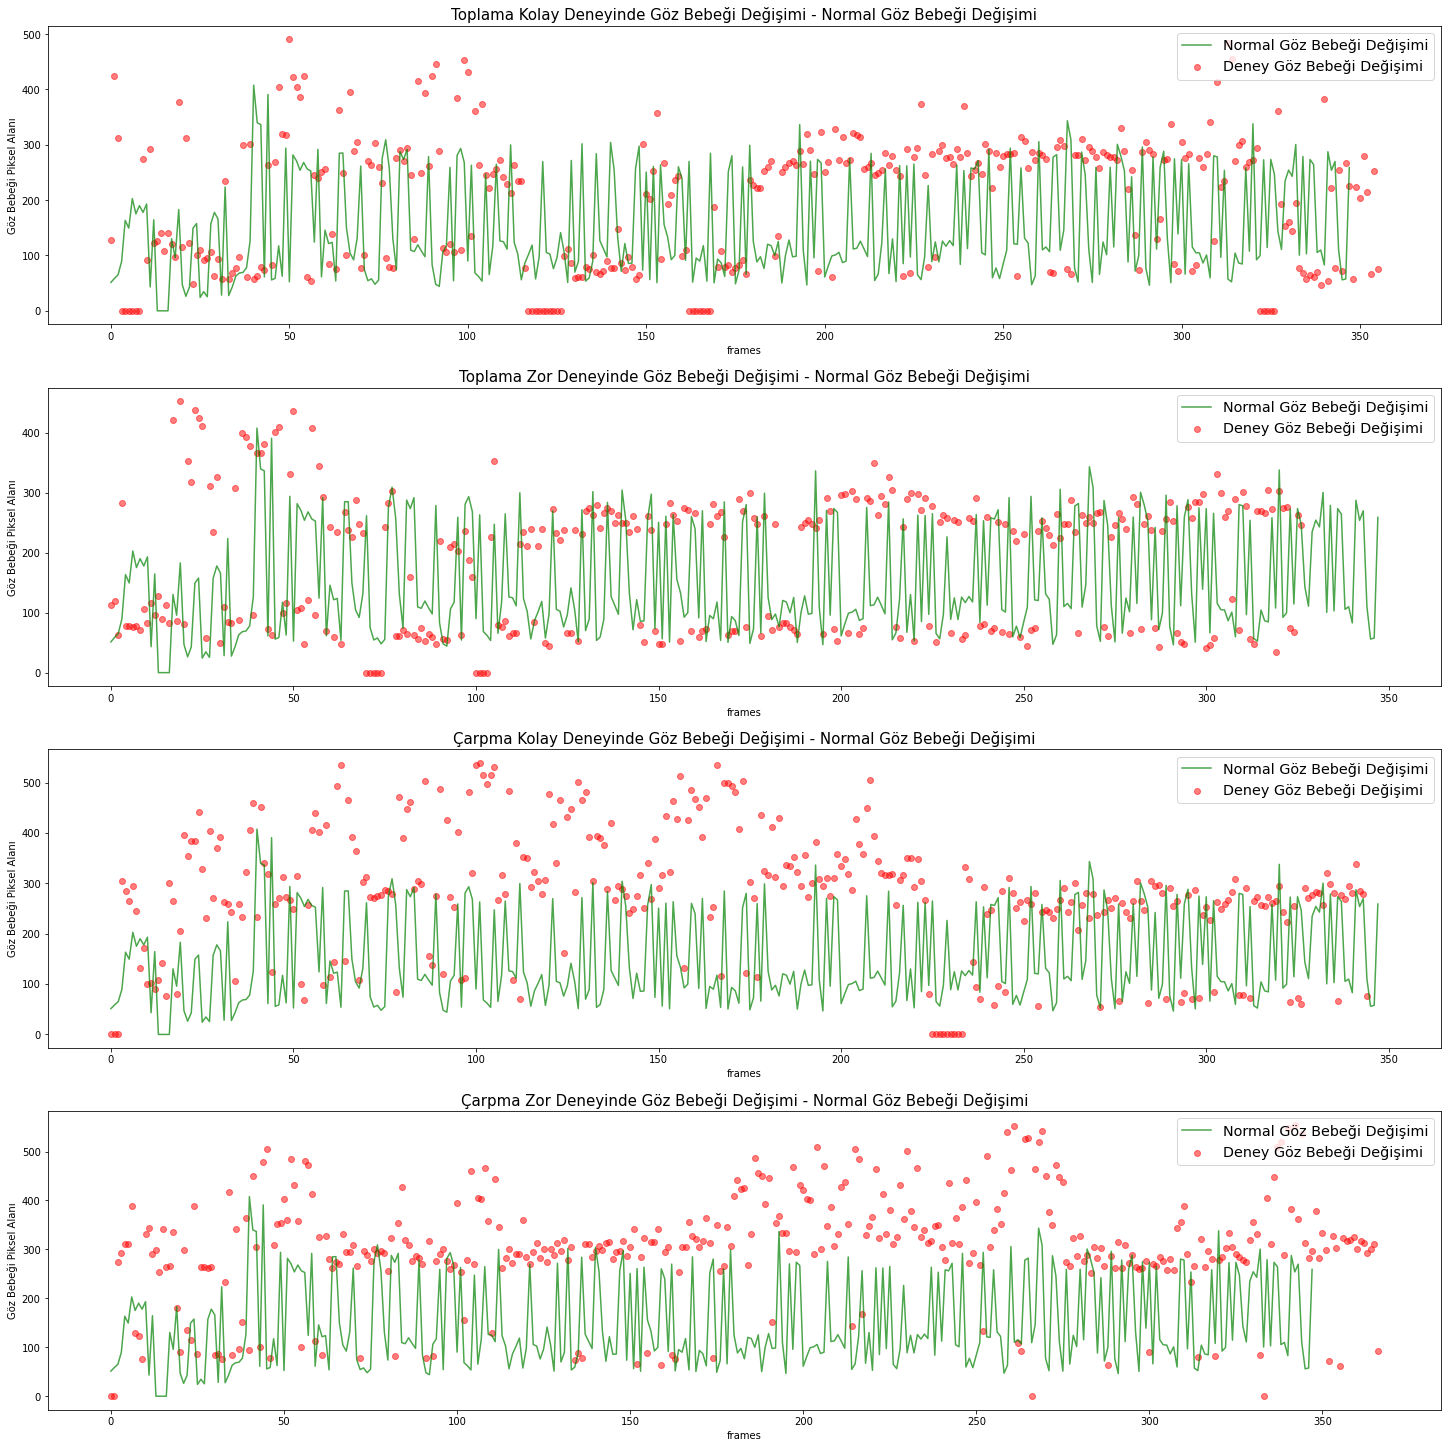

In [98]:
fig, ax = plt.subplots(figsize=(20, 20), nrows=4, ncols=1, constrained_layout=True)

for i,(exp,name) in enumerate(zip(rk_cog, exp_names)):
    plot_subject_experiment(rk_normal, exp, ax[i], name)

plt.show()

In [99]:
ekrem_hp0 = get_subject_experiment_df("ekrem", "happiness0")
ekrem_hp1 = get_subject_experiment_df("ekrem", "happiness1")
ekrem_hp2 = get_subject_experiment_df("ekrem", "happiness2")
ekrem_hps = [ekrem_hp0, ekrem_hp1, ekrem_hp2]
ekrem_normal = get_subject_experiment_df("ekrem", "normal")

In [100]:
hp_names = ["Mutluluk - Görsel", "Mutluluk - Ses", "Mutluluk - Ses + Görsel"]

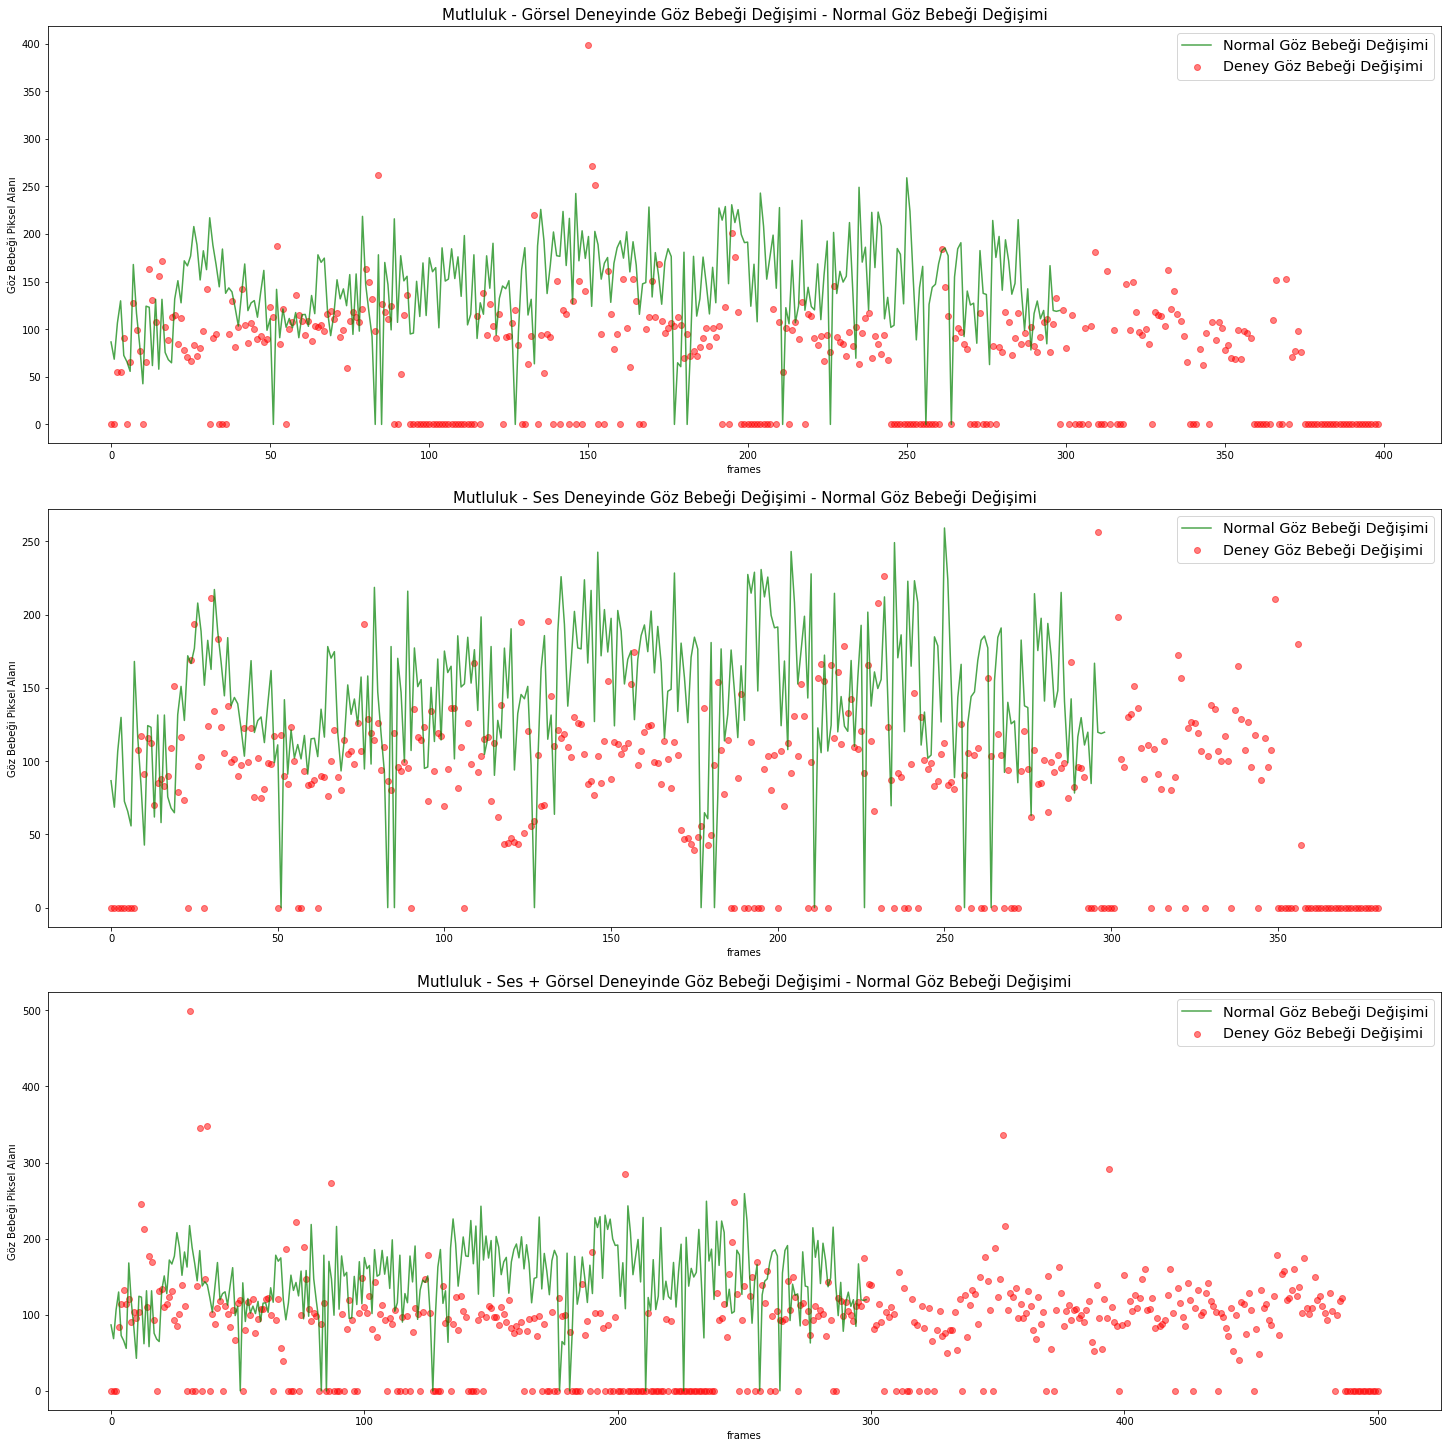

In [101]:
fig, ax = plt.subplots(figsize=(20, 20), nrows=3, ncols=1, constrained_layout=True)

for i,(exp,name) in enumerate(zip(ekrem_hps, hp_names)):
    plot_subject_experiment(ekrem_normal, exp, ax[i], name)

plt.show()

In [30]:
normal_size = normal_df["left_eye_area"].mean()

In [136]:
emotion_change_perc = ((emotion_size - normal_size) / normal_size) * 100

In [141]:
cognitive_change_perc = ((cognitive_size - normal_size) / normal_size ) * 100

In [142]:
tr_emotion_exp = ["Korku", "Üzüntü", "Mutluluk", "Politik", "Vatansever"]

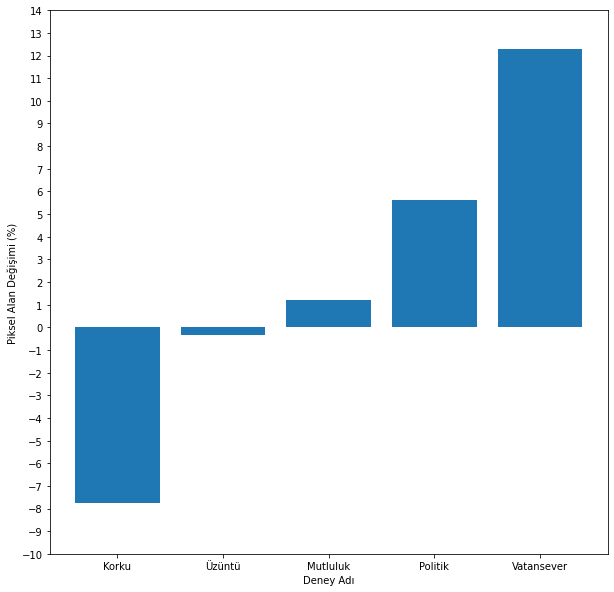

In [143]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(tr_emotion_exp, emotion_change_perc)
ax.set_yticks(np.arange(-10, 15, 1))
ax.set_ylabel("Piksel Alan Değişimi (%)")
ax.set_xlabel("Deney Adı")
plt.show()

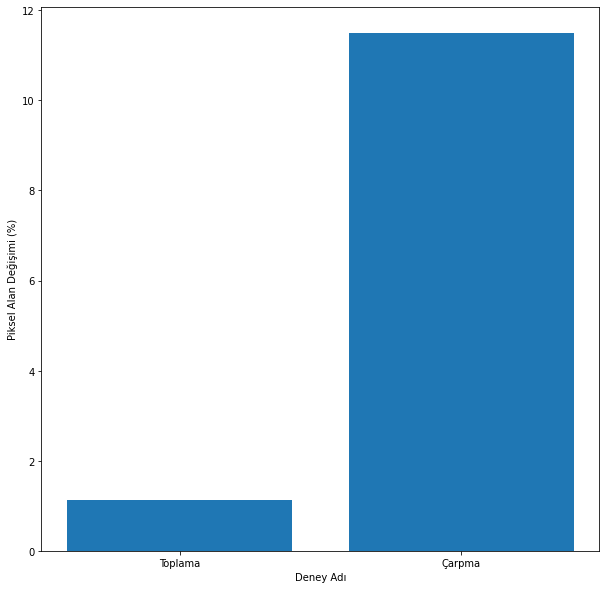

In [144]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(["Toplama", "Çarpma"], cognitive_change_perc)
ax.set_ylabel("Piksel Alan Değişimi (%)")
ax.set_xlabel("Deney Adı")
plt.show()